### Bank suscription predictor

In this project we will use a Portuguese Bank Marketing Data Set, which you can find on kaggle [here](https://www.kaggle.com/datasets/yufengsui/portuguese-bank-marketing-data-set?resource=download&select=bank-full.csv), to predict a hypothetical term deposit. To do so, we will follow the data science workflow shown in the figure below.
![alt text](datascience_workflow.jpeg "Title")
Since the data is already collected, we will start with the second step, the process of cleaning the dataset.

In [36]:
# We define all the packages needed to carry out the project
# --- Data visualization and data analysis ---
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import seaborn as sns
import numpy as np
import scipy
from scipy.stats import uniform
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import model_selection
from sklearn import preprocessing

# --- Machine learning models ---
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

# Used to ignore warnings generated from StackingCVClassifier
import warnings
warnings.simplefilter('ignore')

In [2]:
# We import the dataset as a Pandas DataFrame object
data = pd.read_csv('bank-full.csv', sep=';')

# To understand a little bit more about the dataset, we ask Python to give us some information about it
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


It is good to note that there are just object (string) and integer variables in the dataset. This means that all the variables are of $categorical$ type. Also, we have 45211 rows and 17 columns. Let us inspect the values the variables take in each column.

In [3]:
# Let us check if there are missing values in each column of the dataset
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Since the dataset has no missing values because all the values we got above are 0, we are in a good position to tackle the data exploration stage.

In [4]:
# Let us get some statistical information regarding the non-categorical variables of the dataset
data.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

To better understand the numerical data, we proceed to plot it in histograms. We will plot a histogram for each numerical variable.

In [5]:
# We get the names of numerical variables
name_num = data.select_dtypes([np.number]).columns
print(name_num)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


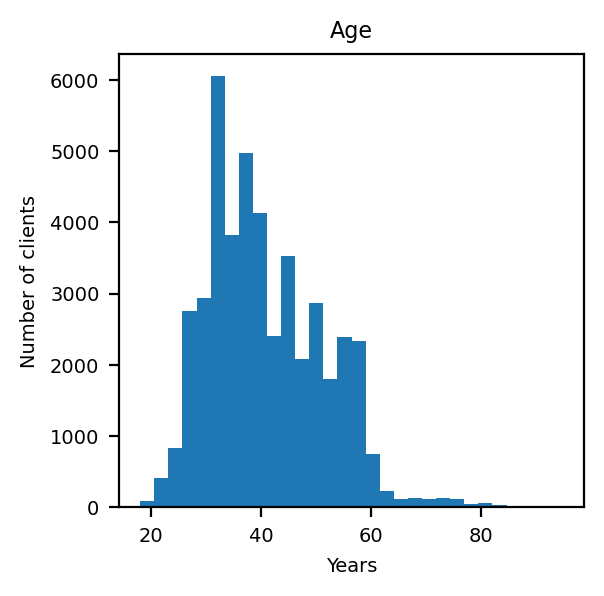

In [10]:
# Histogram of age column
plt.hist(data['age'].values, bins=30, figure=plt.figure(figsize=(3,3), dpi=200))
plt.xlabel('Years', fontsize=7)
plt.ylabel('Number of clients', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

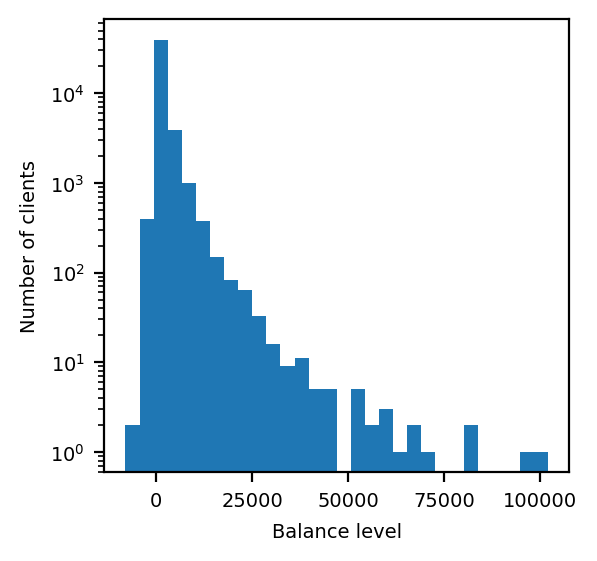

In [9]:
# Histogram of balance column
plt.hist(data['balance'].values, bins=30, figure=plt.figure(figsize=(3,3), dpi=200))
plt.xlabel('Balance level', fontsize=7)
plt.ylabel('Number of clients', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.yscale('log')
plt.show()

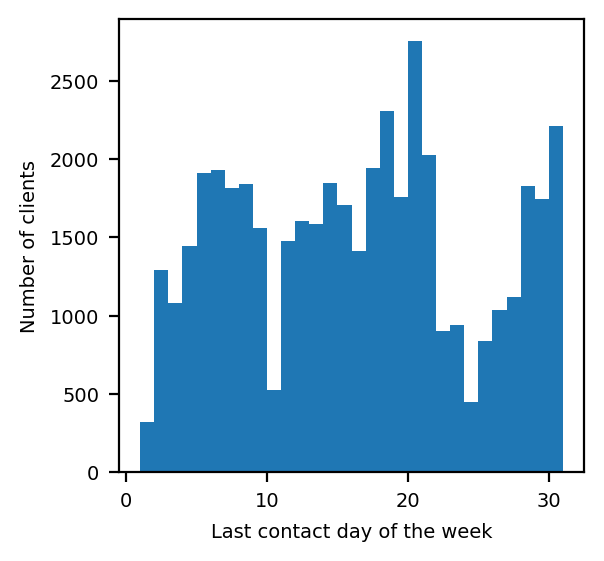

In [11]:
# Histogram of day column
plt.hist(data['day'].values, bins=30, figure=plt.figure(figsize=(3,3), dpi=200))
plt.xlabel('Last contact day of the week', fontsize=7)
plt.ylabel('Number of clients', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

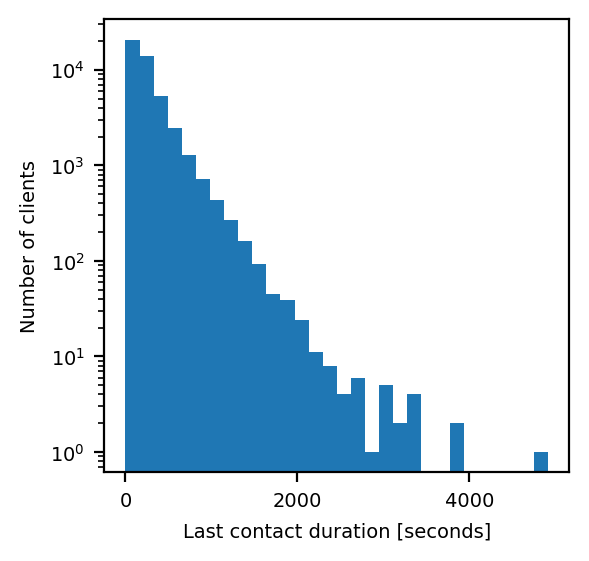

In [14]:
# Histogram of duration column
plt.hist(data['duration'].values, bins=30, figure=plt.figure(figsize=(3,3), dpi=200))
plt.xlabel('Last contact duration [seconds]', fontsize=7)
plt.ylabel('Number of clients', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.yscale('log')
plt.show()

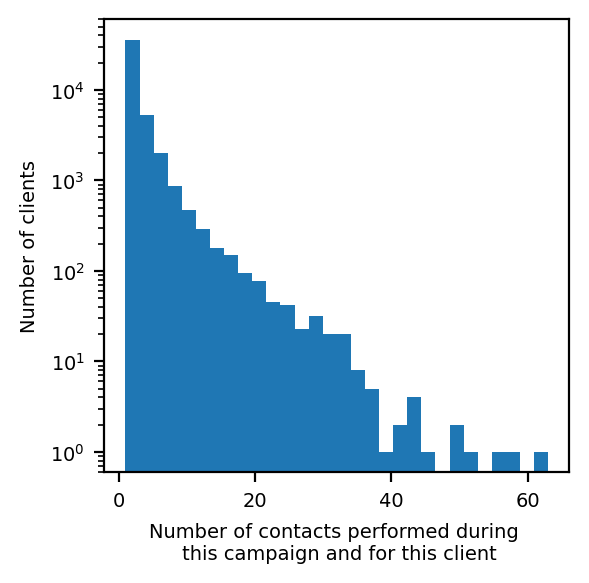

In [16]:
# Histogram of campaign column
plt.hist(data['campaign'].values, bins=30, figure=plt.figure(figsize=(3,3), dpi=200))
plt.xlabel('Number of contacts performed during \n this campaign and for this client', fontsize=7)
plt.ylabel('Number of clients', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.yscale('log')
plt.show()

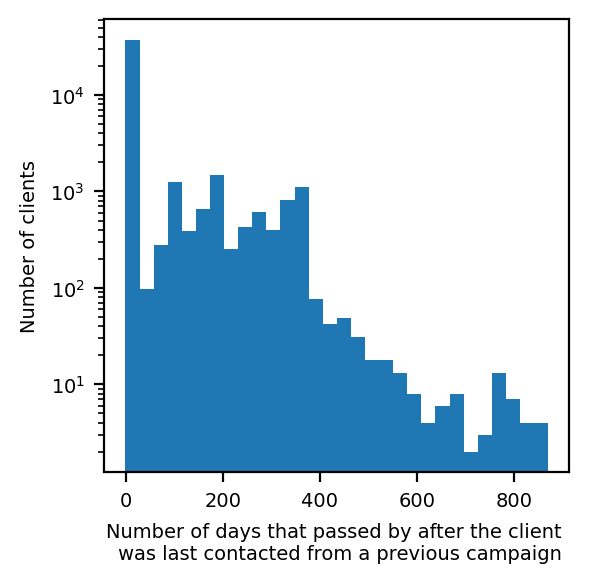

In [18]:
# Histogram of pdays column
plt.hist(data['pdays'].values, bins=30, figure=plt.figure(figsize=(3,3), dpi=200))
plt.xlabel('Number of days that passed by after the client \n was last contacted from a previous campaign', fontsize=7)
plt.ylabel('Number of clients', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.yscale('log')
plt.show()

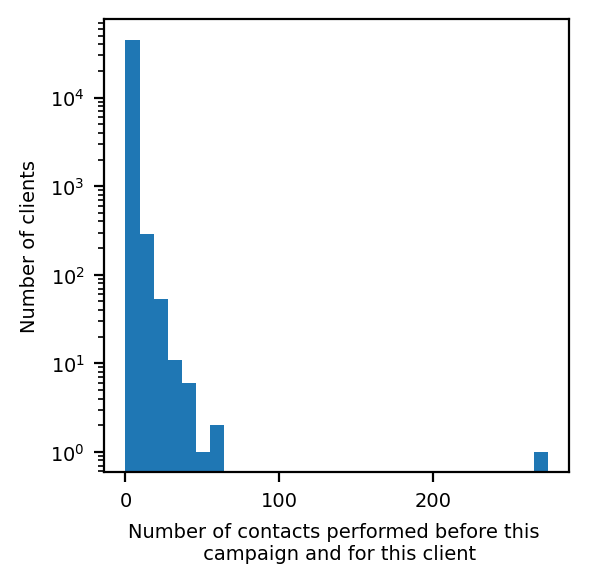

In [20]:
# Histogram of previous column
plt.hist(data['previous'].values, bins=30, figure=plt.figure(figsize=(3,3), dpi=200))
plt.xlabel('Number of contacts performed before this \n campaign and for this client', fontsize=7)
plt.ylabel('Number of clients', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.yscale('log')
plt.show()

Now, we will proceed to make a type of graph similar to the previous ones but for the categorical variables.

In [21]:
# We get the names of the categorical columns
data.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

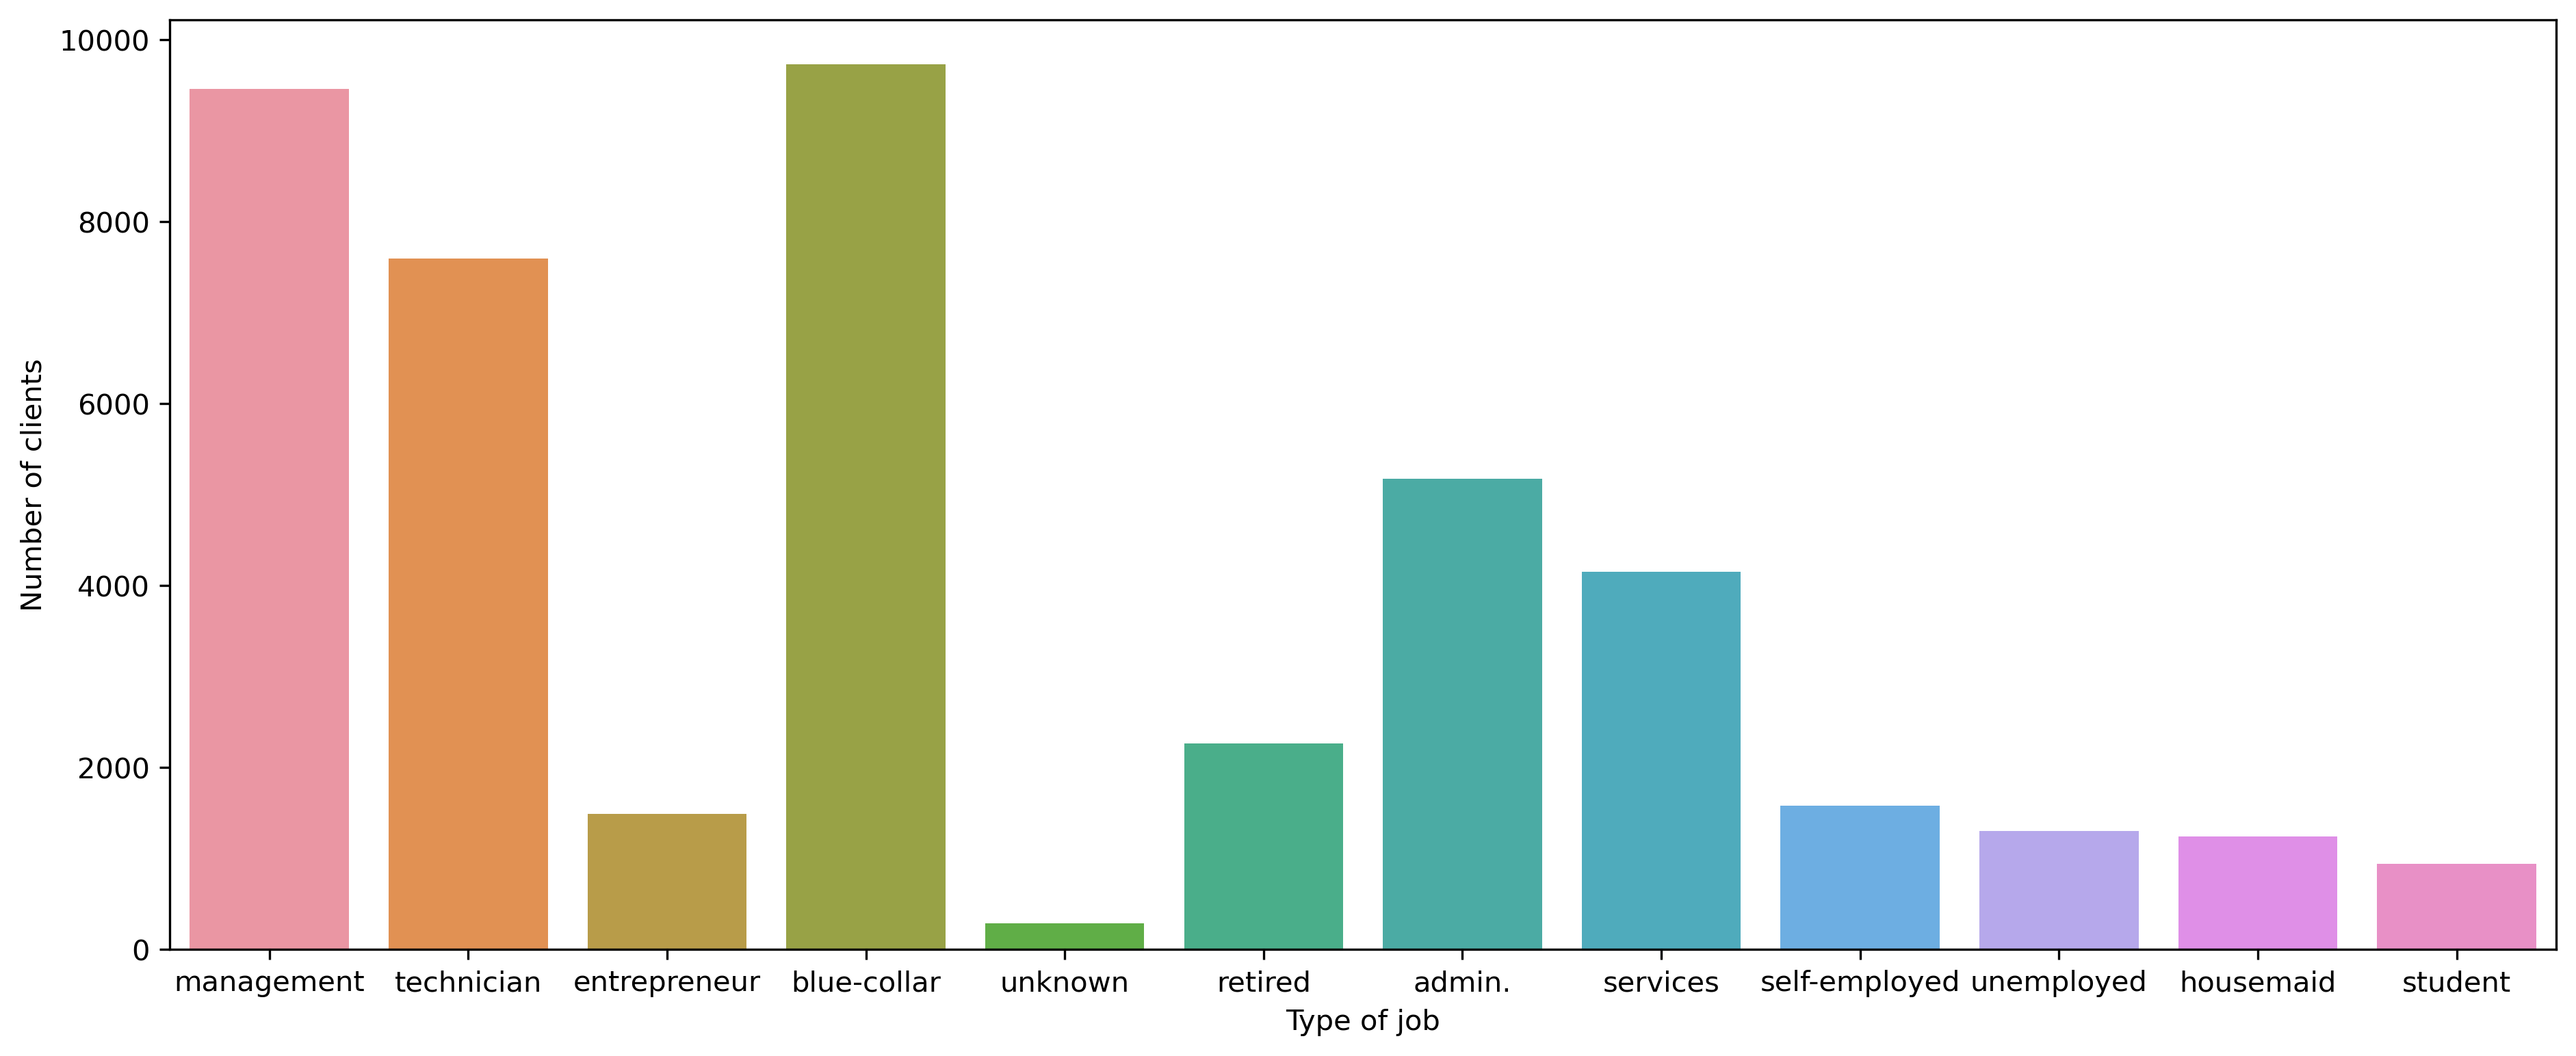

In [22]:
# Counterplot corresponding to job column
sns.countplot(x='job', data=data, figure=plt.figure(figsize=(15,6), dpi=300))
plt.xlabel('Type of job')
plt.ylabel('Number of clients')
plt.show()

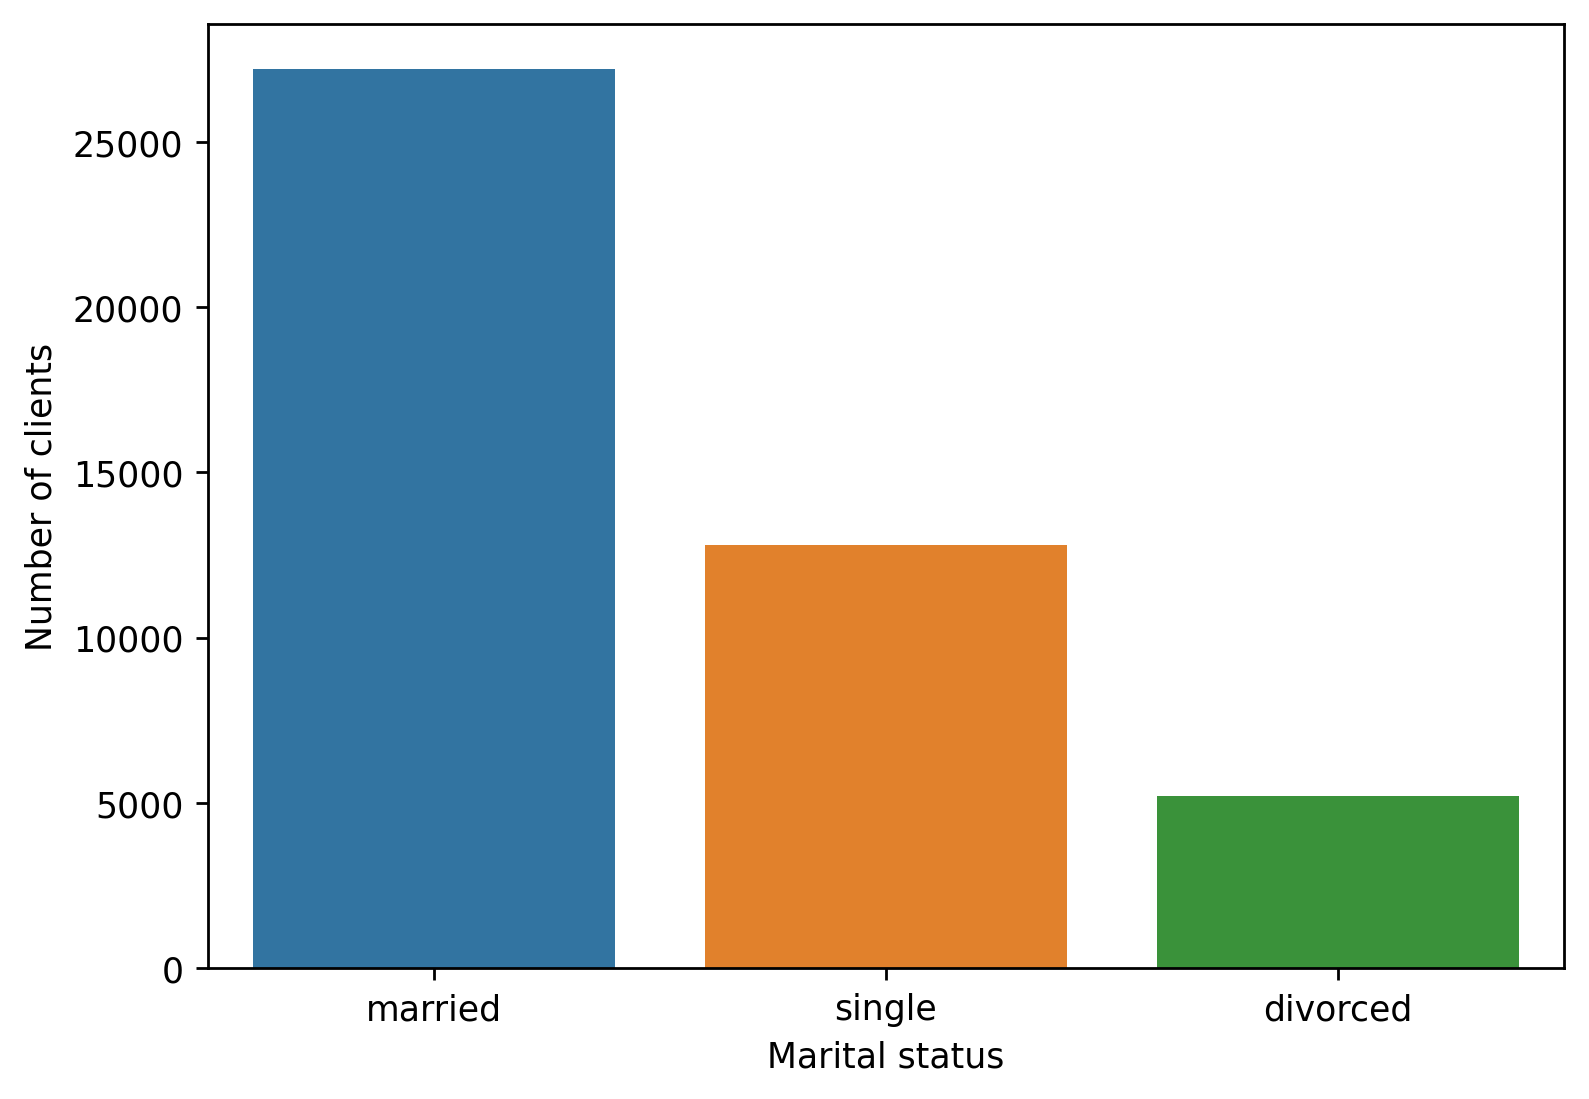

In [23]:
# Counterplot corresponding to marital column
sns.countplot(x='marital', data=data, figure=plt.figure(figsize=(7,5), dpi=250))
plt.xlabel('Marital status')
plt.ylabel('Number of clients')
plt.show()

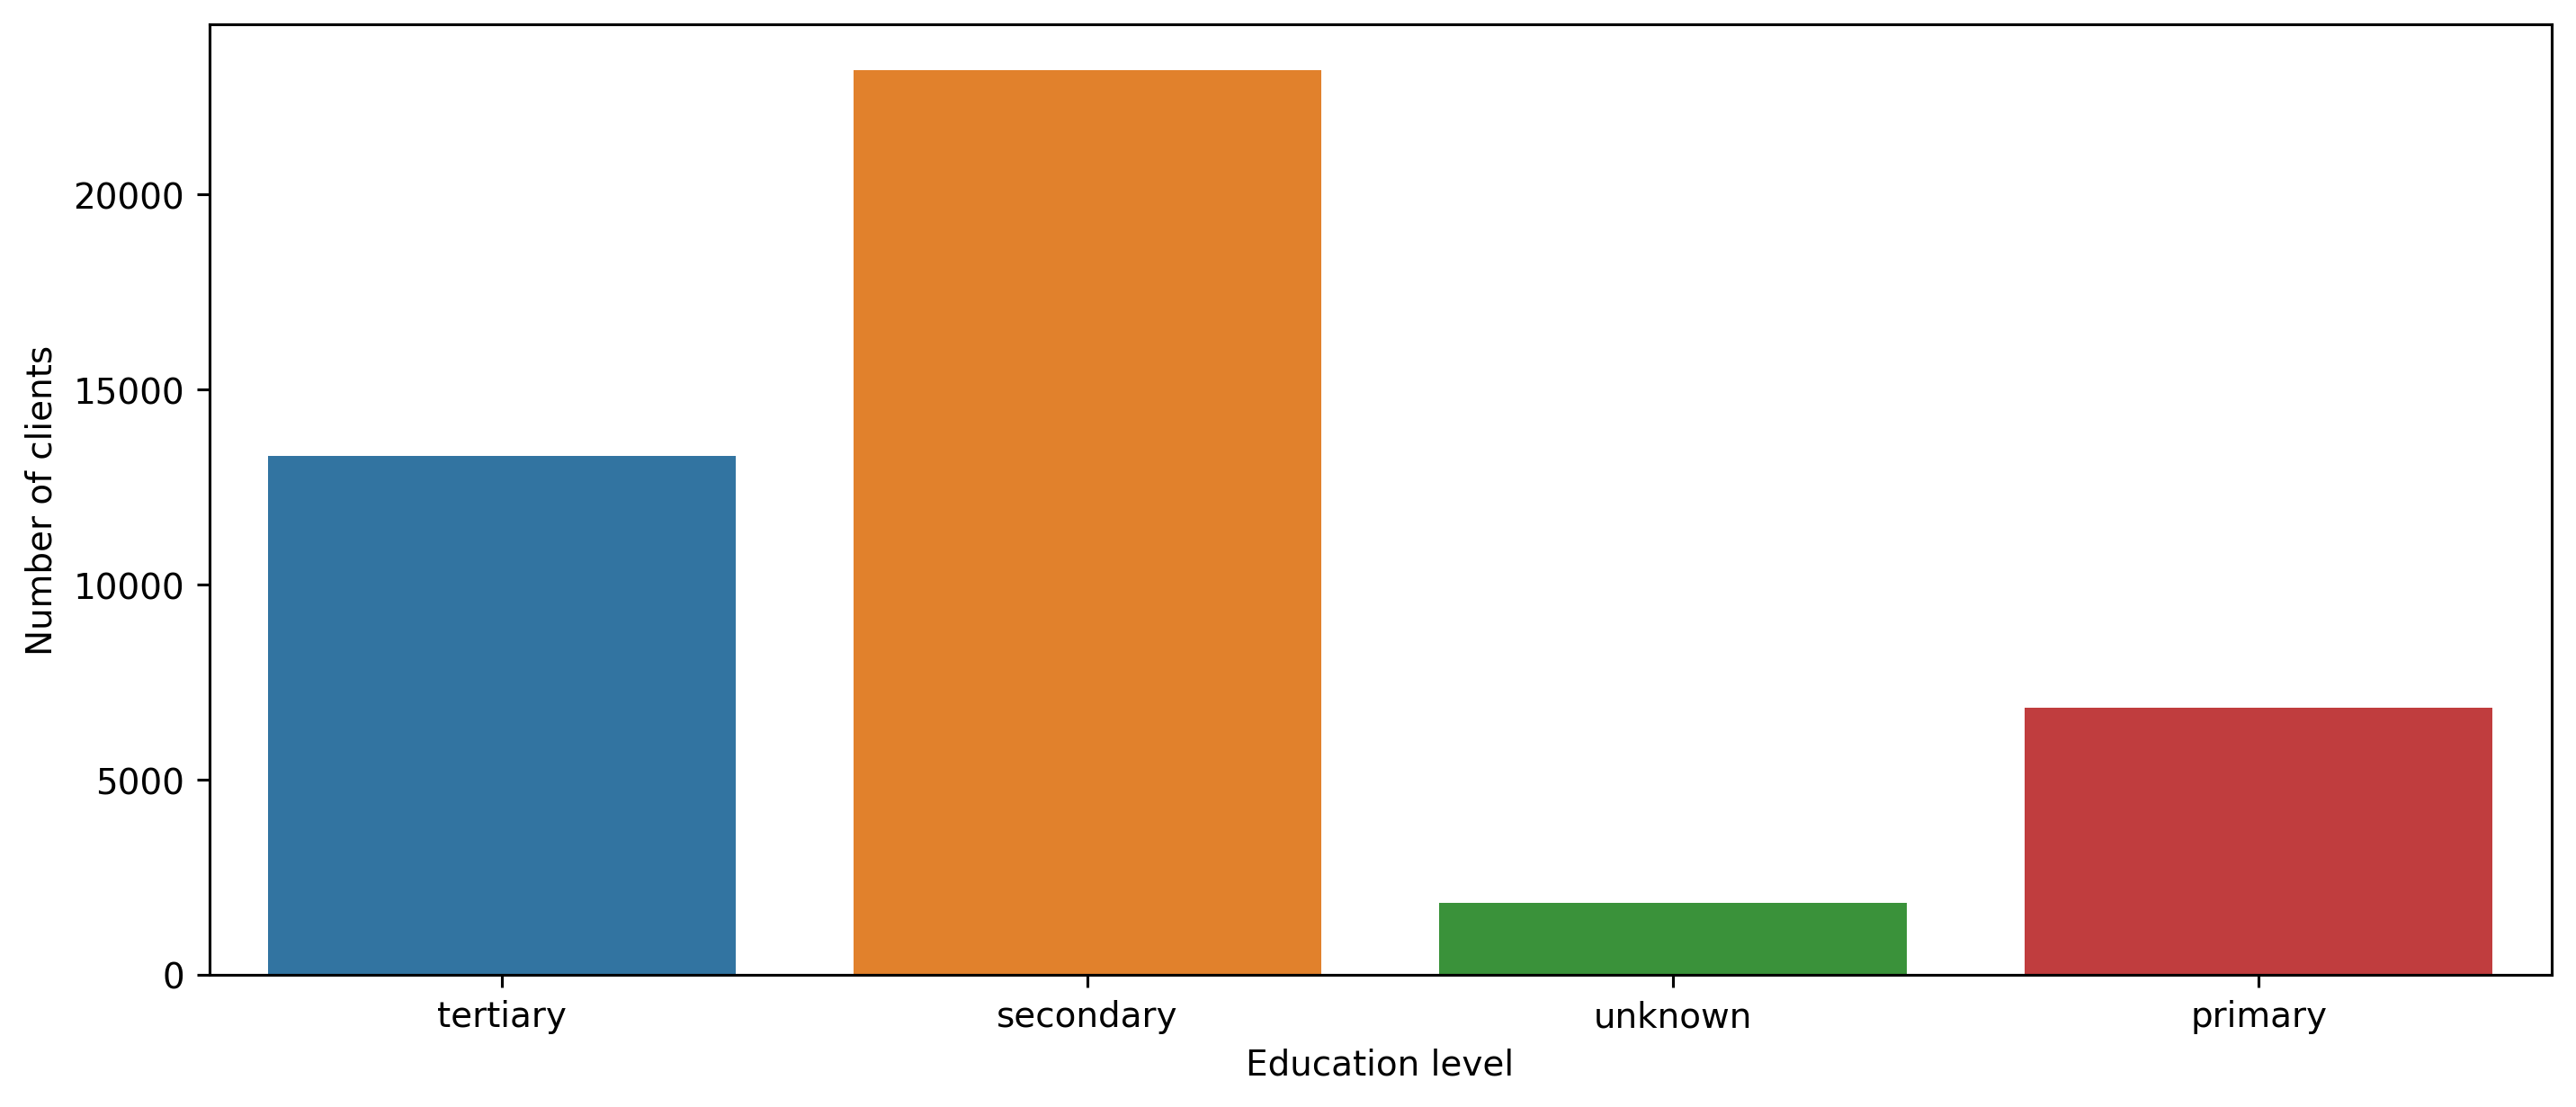

In [24]:
# Counterplot corresponding to education column
sns.countplot(x='education', data=data, figure=plt.figure(figsize=(12,5), dpi=280))
plt.xlabel('Education level')
plt.ylabel('Number of clients')
plt.show()

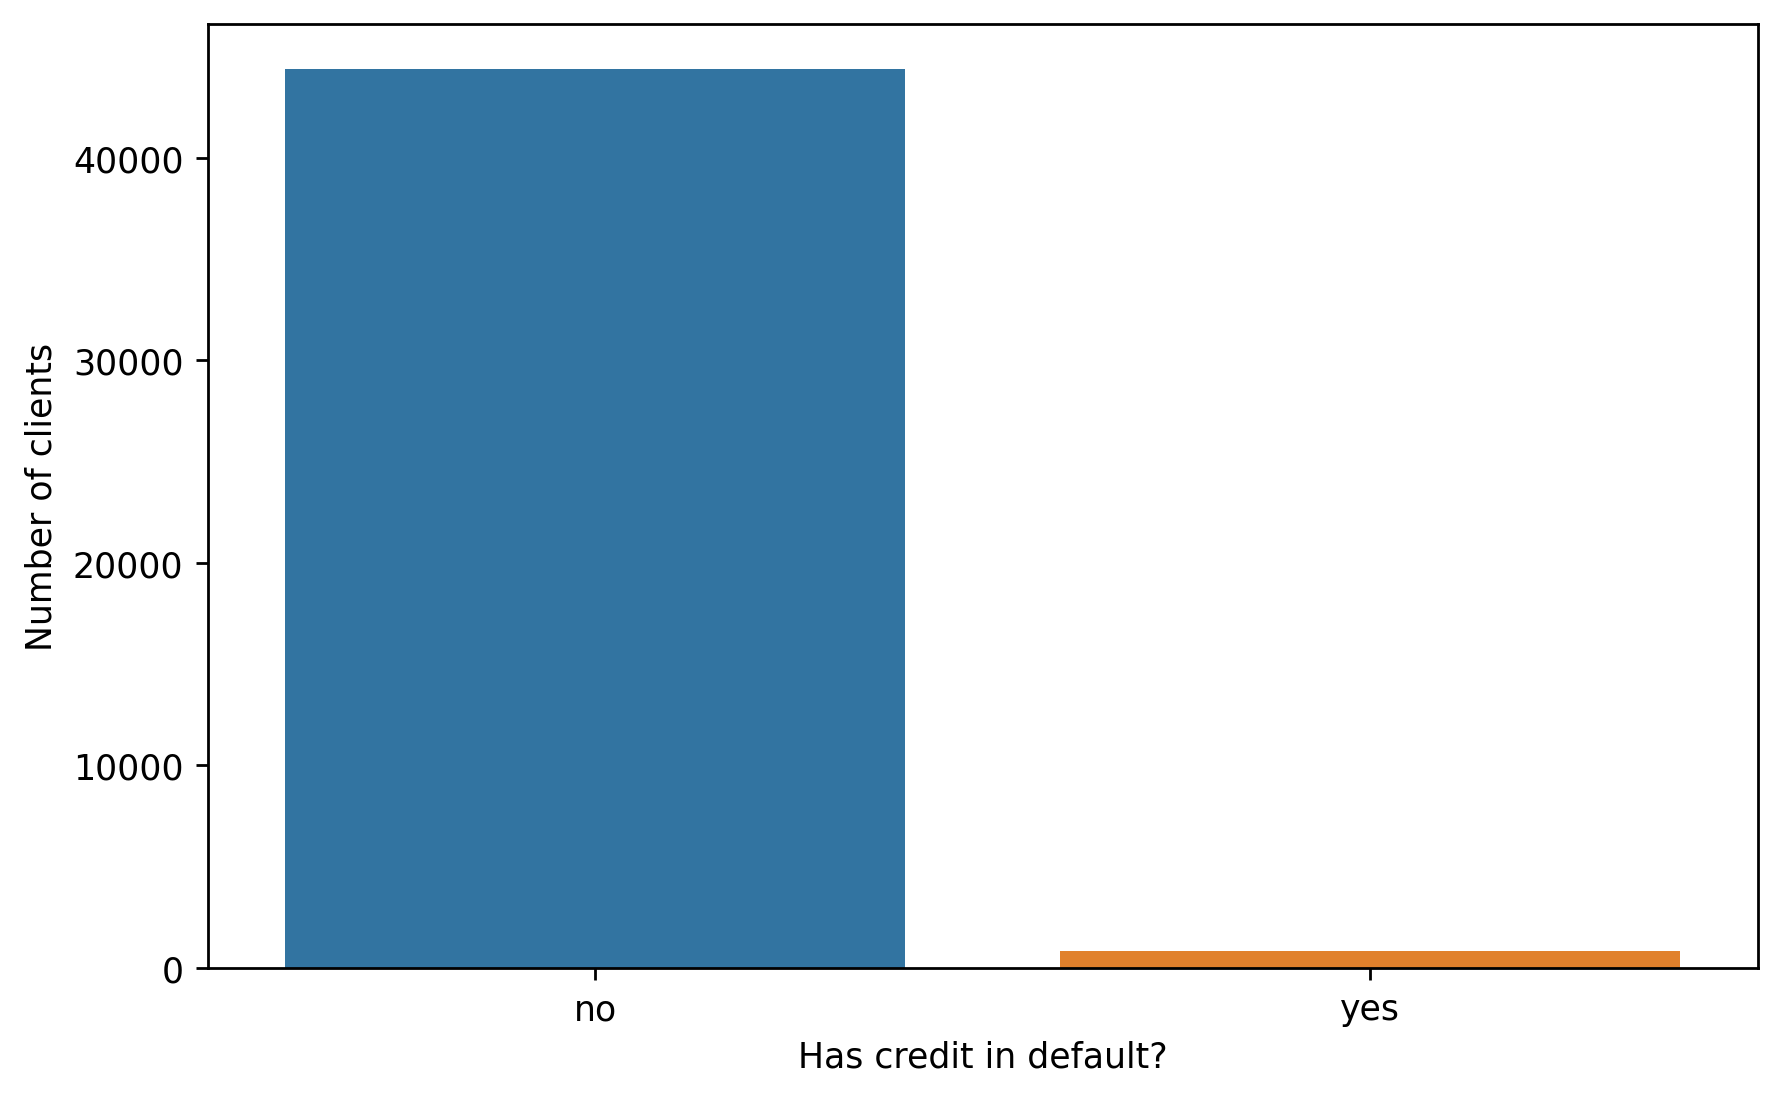

In [26]:
# Counterplot corresponding to default column
sns.countplot(x='default', data=data, figure=plt.figure(figsize=(8,5), dpi=250))
plt.xlabel('Has credit in default?')
plt.ylabel('Number of clients')
plt.show()

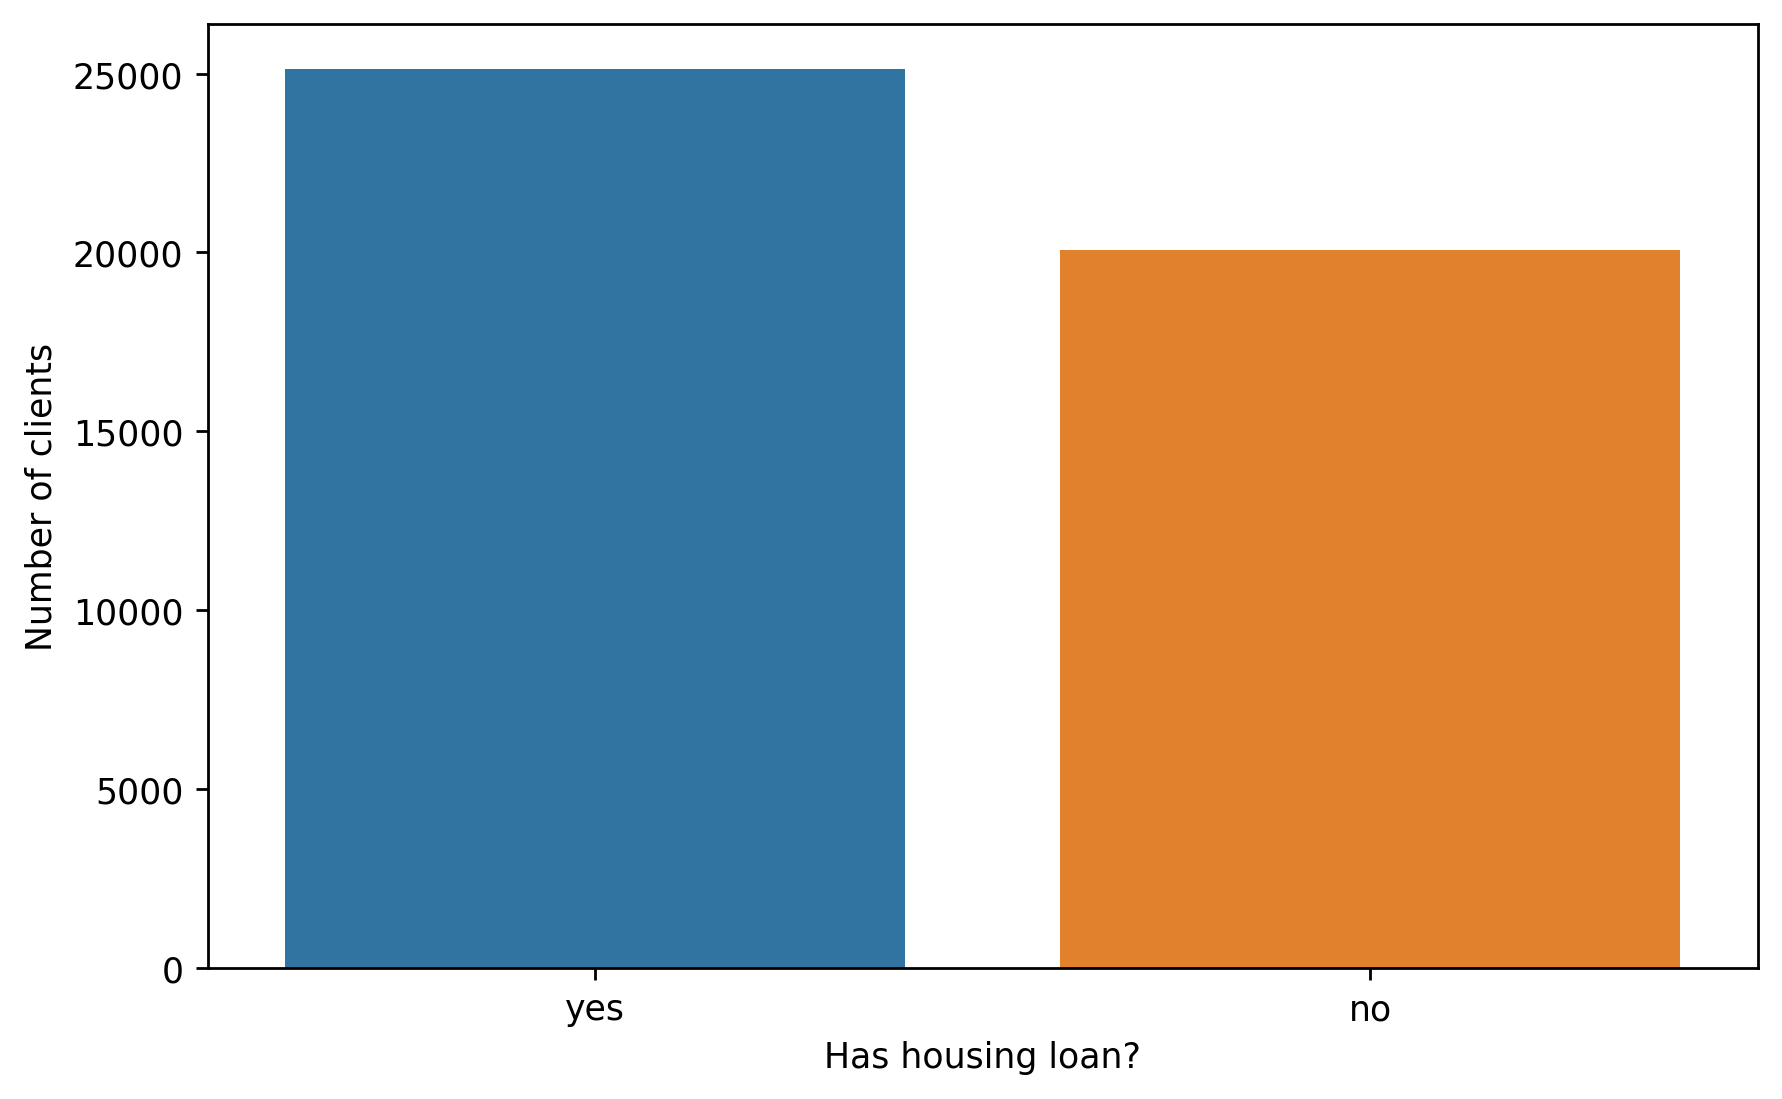

In [27]:
# Counterplot corresponding to housing column
sns.countplot(x='housing', data=data, figure=plt.figure(figsize=(8,5), dpi=250))
plt.xlabel('Has housing loan?')
plt.ylabel('Number of clients')
plt.show()

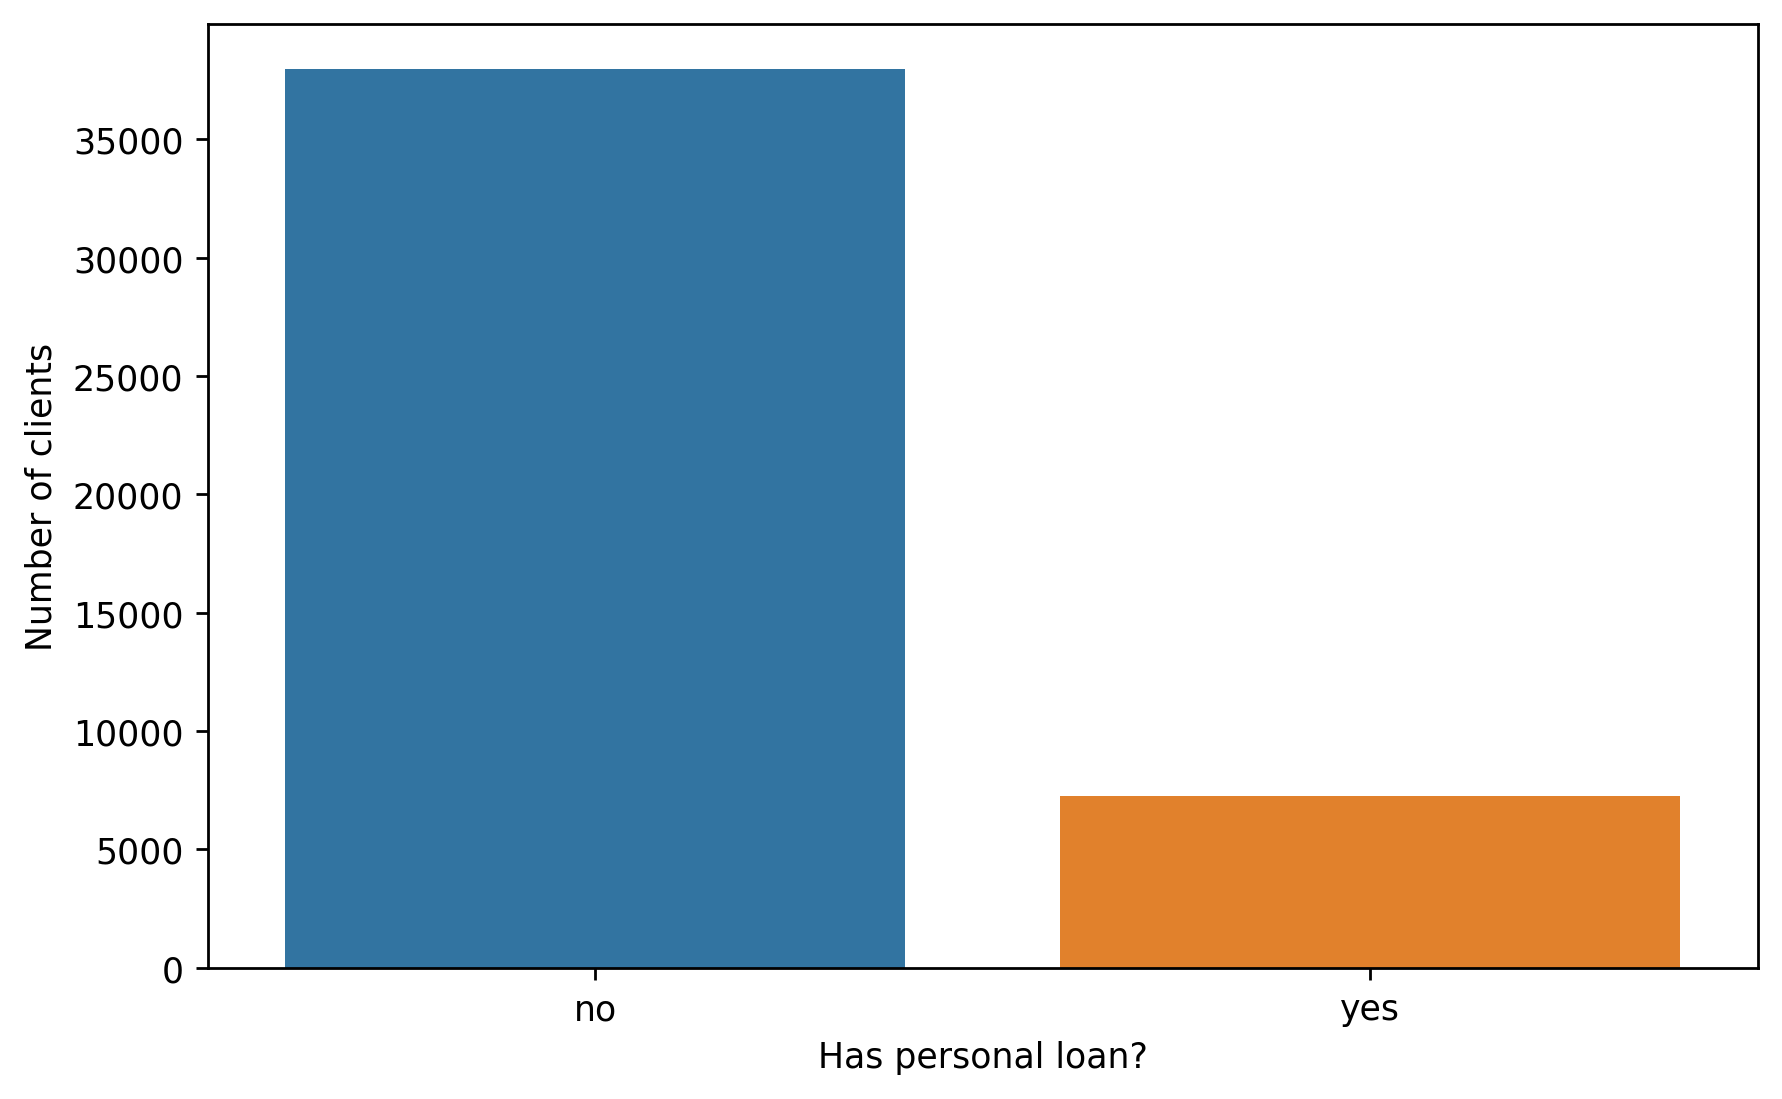

In [28]:
# Counterplot corresponding to loan column
sns.countplot(x='loan', data=data, figure=plt.figure(figsize=(8,5), dpi=250))
plt.xlabel('Has personal loan?')
plt.ylabel('Number of clients')
plt.show()

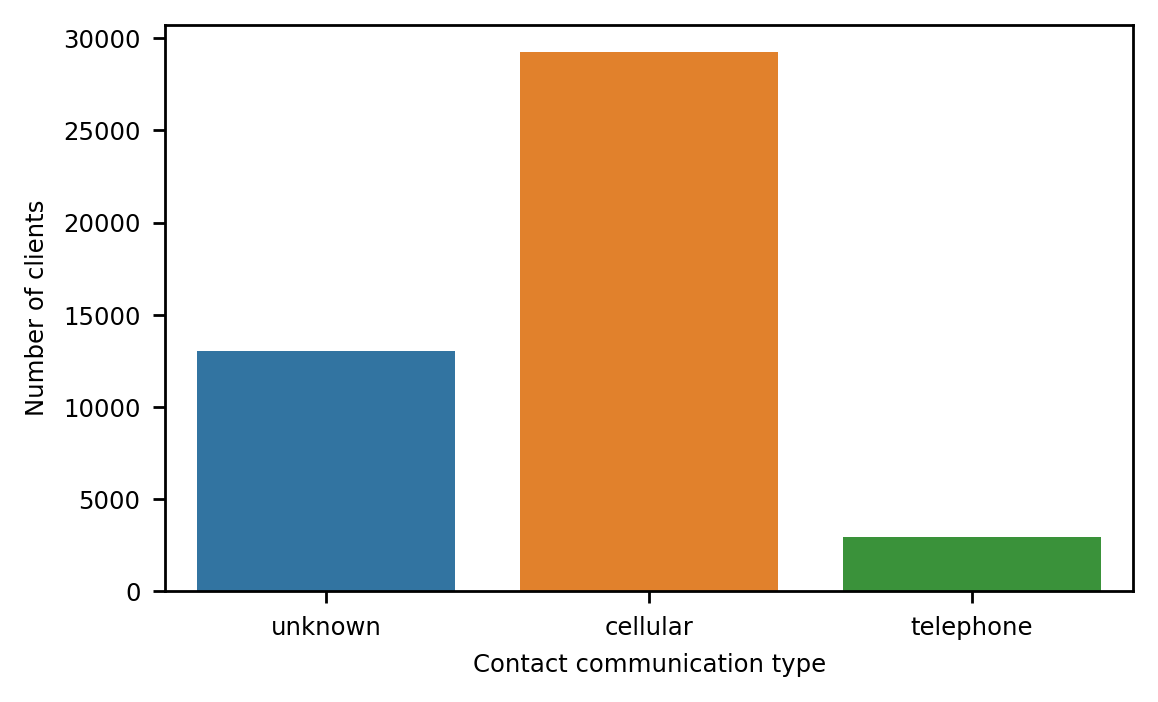

In [29]:
# Counterplot corresponding to contact column
sns.countplot(x='contact', data=data, figure=plt.figure(figsize=(5,3), dpi=250))
plt.xlabel('Contact communication type', fontsize=7)
plt.ylabel('Number of clients', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

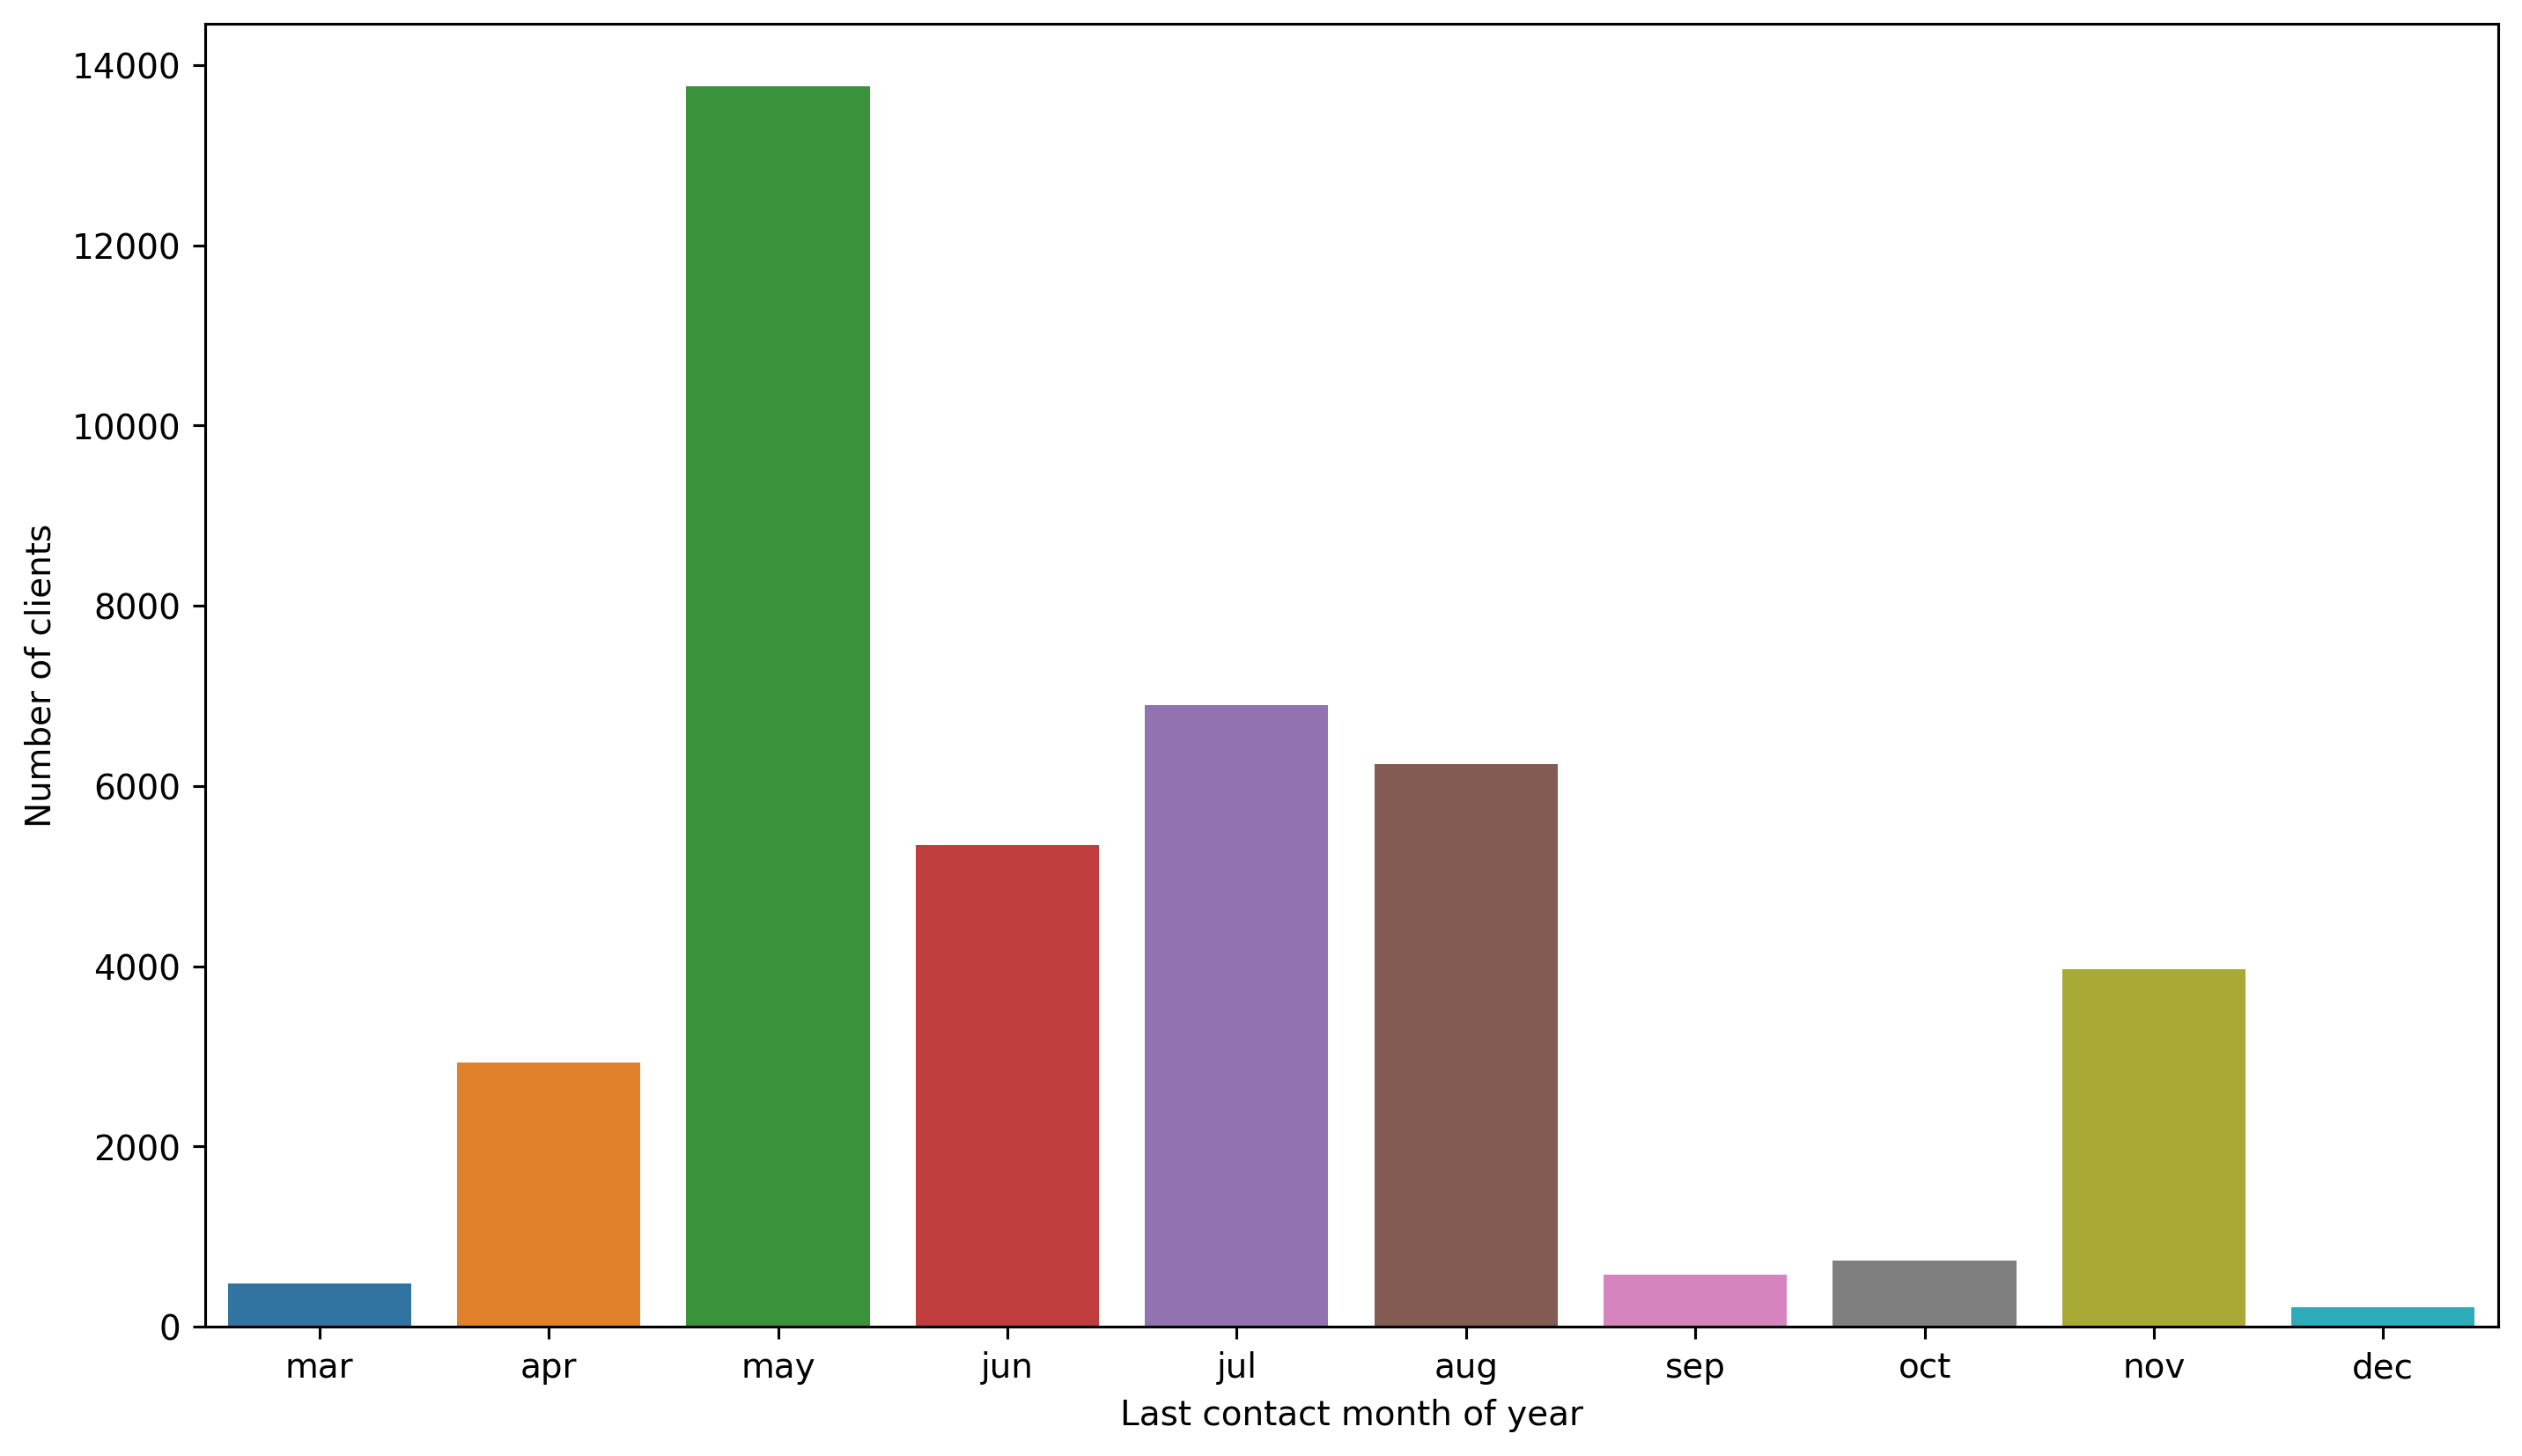

In [30]:
# Counterplot corresponding to month column
sns.countplot(x='month', data=data, order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], figure=plt.figure(figsize=(12,7), dpi=280))
plt.xlabel('Last contact month of year')
plt.ylabel('Number of clients')
plt.show()

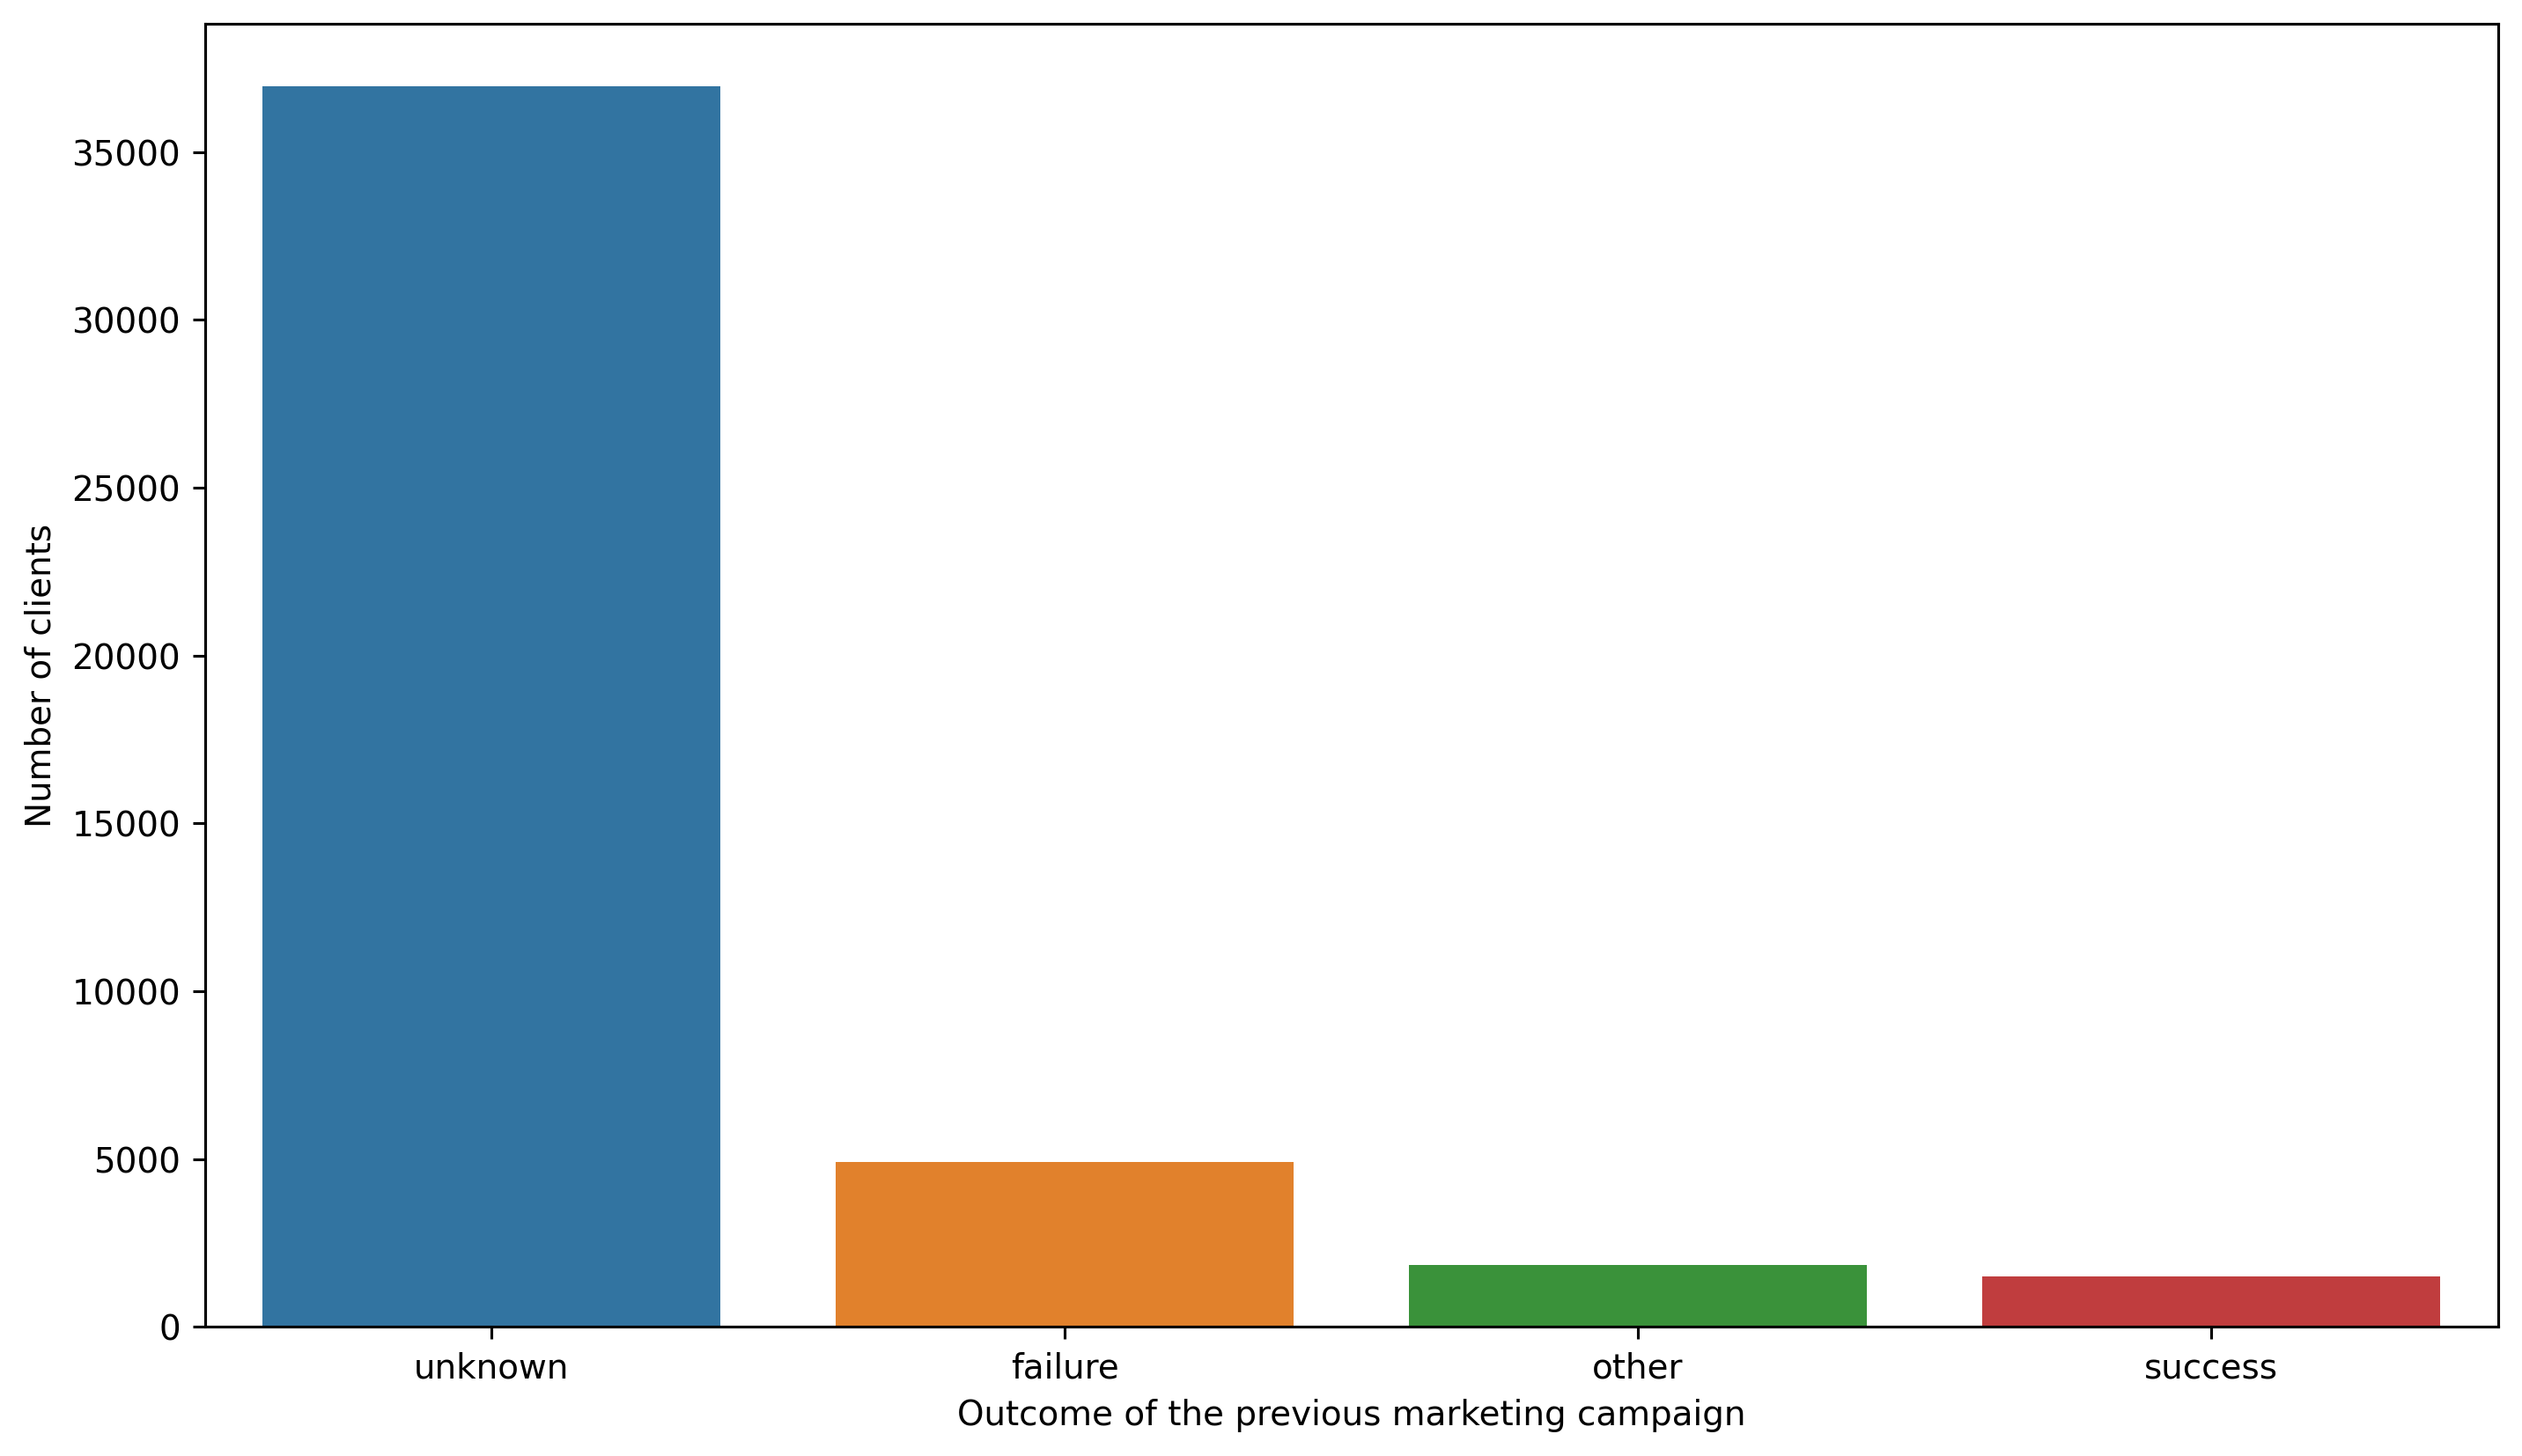

In [32]:
# Counterplot corresponding to poutcome column
sns.countplot(x='poutcome', data=data, figure=plt.figure(figsize=(12,7), dpi=280))
plt.xlabel('Outcome of the previous marketing campaign')
plt.ylabel('Number of clients')
plt.show()

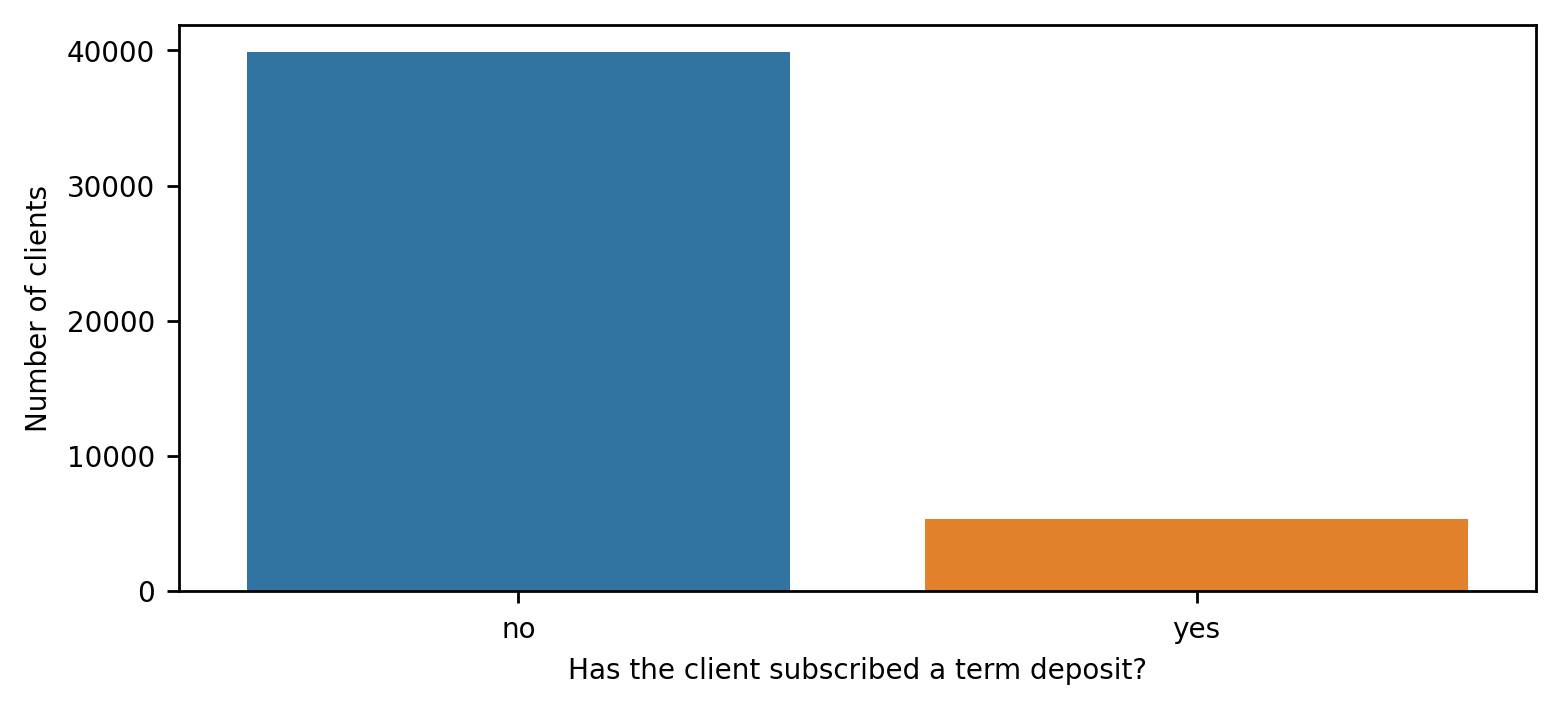

In [33]:
# Counterplot corresponding to y column
sns.countplot(x='y', data=data, figure=plt.figure(figsize=(7,3), dpi=250))
plt.xlabel('Has the client subscribed a term deposit?', fontsize=8)
plt.ylabel('Number of clients', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Lo siguiente a hacer previo a pasar a la construcción e implementación del modelo de predicción es convertir todas las variables categóricas en números. Para eso, haremos uso del método $\textit{label encoding}$.

In [37]:
# We create a LabelEnconder object
encoder = preprocessing.LabelEncoder()

# We create an iterator over the names of the categorical variables
categorical_labels = data.select_dtypes(include=['object']).columns

# We overwrite the columns of the categorical variables to convert them into numeric values
for label in categorical_labels:
    data[label] = encoder.fit_transform(data[label])

In [38]:
# Let us see the result of transforming the categorical variables
for label in categorical_labels:
    print(data[label].value_counts())
    print('-------------------------')

1     9732
4     9458
9     7597
0     5171
7     4154
5     2264
6     1579
2     1487
10    1303
3     1240
8      938
11     288
Name: job, dtype: int64
-------------------------
1    27214
2    12790
0     5207
Name: marital, dtype: int64
-------------------------
1    23202
2    13301
0     6851
3     1857
Name: education, dtype: int64
-------------------------
0    44396
1      815
Name: default, dtype: int64
-------------------------
1    25130
0    20081
Name: housing, dtype: int64
-------------------------
0    37967
1     7244
Name: loan, dtype: int64
-------------------------
0    29285
2    13020
1     2906
Name: contact, dtype: int64
-------------------------
8     13766
5      6895
1      6247
6      5341
9      3970
0      2932
3      2649
4      1403
10      738
11      579
7       477
2       214
Name: month, dtype: int64
-------------------------
3    36959
0     4901
1     1840
2     1511
Name: poutcome, dtype: int64
-------------------------
0    39922
1     5289
Na

Ahora estamos listos para la etapa del modelado. El objetivo es evaluar una serie de modelos de clasificación y elegir el que mejor resultados devuelve prediciendo la columna 21 que representa si se suscribe al servicio correspondiente. Preparemos el conjunto de valores con el cual se entrenarán los modelos y el conjunto de datos objetivo, los cuales servirán para corroborar las predicciones hechas por dichos modelos.

In [33]:
# Las datos con los que se entrenará y evaluará a los modelos serán almacenados en la variable X
X = data.drop(columns=['duration', 'y'], axis=1)

# Las datos objetivos con los que se corroborarán las predicciones de los modelos serán almacenados en la variable Y
Y = data['y']

En la variable X $\textit{no}$ almacenamos la columna duration ya que solo debe ser tomada como referencia en el análisis descriptivo de los datos y no durante el proceso de entrenamiento. Como lo que queremos implementar es un modelo de aprendizaje automático, debemos tener datos de entrenamiento y de validación. Para ello, procedemos a dividir los datos almacenados en X e Y en esos dos tipos de clases.

In [34]:
# Generaremos 4 tipos de datos, los datos de entrada del algoritmo en versión entrenamiento y validación y los datos objetivos
# en las mismas dos versiones. El conjunto de datos de validación será el 20% del conjunto de datos de entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [35]:
# Chequeemos los tamaños de los conjuntos de entrenamiento y validación
print('X_train.shape =', X_train.shape, 'X_test.shape =', X_test.shape, 'Y_train.shape =', Y_train.shape, 'Y_test.shape =', Y_test.shape)

X_train.shape = (32950, 19) X_test.shape = (8238, 19) Y_train.shape = (32950,) Y_test.shape = (8238,)


Con los conjuntos de datos listos para ser utilizados, estamos en condiciones de abordar el estudio de distintos modelos de clasificación. Estudiaremos los modelos de clasificación provistos en el paquete $\textit{xgboost}$, los cuales son los instanciados por las clases $\texttt{XGBClassifier}$ y $\texttt{XGBRFClassifier}$.

In [36]:
# Instanciamos los objetos clasificadores
clasificador, clasificador_RF = [], []
learning_rates = [0.3, 0.03, 0.003]

for eta in learning_rates:
    clasificador.append(XGBClassifier(learning_rate=eta,
                                      gamma=0.1,
                                      max_depth=5,
                                      colsample_bytree=0.8,
                                      subsample=0.8,
                                      min_child_weight=1,
                                      scale_pos_weight=1,
                                      objective='binary:logistic'))
    clasificador_RF.append(XGBRFClassifier(learning_rate=eta,
                                      gamma=0.1,
                                      max_depth=5,
                                      colsample_bytree=0.8,
                                      subsample=0.8,
                                      min_child_weight=1,
                                      scale_pos_weight=1,
                                      objective='binary:logistic'))

Evaluaremos 6 modelos diferentes, de dos tipos principales, un clasificador y un clasificador que utiliza la técnica de $\textit{random forest}$. En ambos casos se probará con 3 tasas de aprendizaje diferentes, las cuales fueron elegidas como $\eta_{1} = 0.3$, $\eta_{2} = 0.03$ y $\eta_{3} = 0.003$.

In [37]:
# Entrenamos a los modelos propuestos
clasificador[0].fit(X_train, Y_train, eval_metric='auc')
clasificador[1].fit(X_train, Y_train, eval_metric='auc')
clasificador[2].fit(X_train, Y_train, eval_metric='auc')
clasificador_RF[0].fit(X_train, Y_train, eval_metric='auc')
clasificador_RF[1].fit(X_train, Y_train, eval_metric='auc')
clasificador_RF[2].fit(X_train, Y_train, eval_metric='auc')

C:\Users\santy\anaconda3\envs\env-ml\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=0.8, enable_categorical=False, gamma=0.1,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                learning_rate=0.003, max_delta_step=0, max_depth=5,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=8, num_parallel_tree=100,
                objective='binary:logistic', predictor='auto', random_state=0,
                reg_alpha=0, scale_pos_weight=1, tree_method='exact',
                validate_parameters=1, verbosity=None)

In [38]:
# Veamos las predicciones que hacen los modelos entrenados sobre los datos de evaluación
test_pred, test_pred_RF = [], []

for i in range(len(clasificador)):
    test_pred.append(clasificador[i].predict(X_test))
    test_pred_RF.append(clasificador_RF[i].predict(X_test))

Ahora debemos evaluar la eficacia de las predicciones hechas por los modelos entrenados. Para eso usaremos la métrica $\texttt{average_precision_score}$ provista por sklearn.

In [39]:
# Calculemos los average_precision_scores para cada uno de los 6 modelos.
aps, aps_RF = [], []

for i in range(len(clasificador)):
    aps.append(metrics.average_precision_score(Y_test, test_pred[i]))
    aps_RF.append(metrics.average_precision_score(Y_test, test_pred_RF[i]))

In [40]:
# Veamos los valores de los average_precision_scores
for i, eta in enumerate(learning_rates):
    print('aps_{} ='.format(eta), aps[i], '---', 'aps_RF_{} ='.format(eta), aps_RF[i])

aps_0.3 = 0.23487689969827338 --- aps_RF_0.3 = 0.260407732157748
aps_0.03 = 0.2540270205214146 --- aps_RF_0.03 = 0.260407732157748
aps_0.003 = 0.26111198382085093 --- aps_RF_0.003 = 0.260407732157748


Para dar la conclusión final, debemos calcular el porcentaje de valores 'yes' en $Y_{train}$.

In [41]:
# Calculemos los valores que hay en Y_train
w = Y_train.value_counts()

# Imprimimos la fracción de valores 'yes' sobre el total de valores
print(w[1]/(w[0] + w[1]))

0.11289833080424887


Concluimos que, al ser la fracción de valores 'yes' del orden de 0.11 y por ser el $\textit{average precision score}$ en el caso del modelo XGBClassifier con $\eta_{3} = 0.003$ del orden de 0.26, este modelo es un modelo aceptable para predecir el estado de suscripción de depósito de los clientes del banco.

#### Referencias
[1] https://www.kaggle.com/code/residentmario/data-types-and-missing-values/tutorial

---

[2] https://glassboxmedicine.com/2019/03/02/measuring-performance-auprc/

[3] https://xgboost.readthedocs.io/en/stable/index.html

[4] https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/